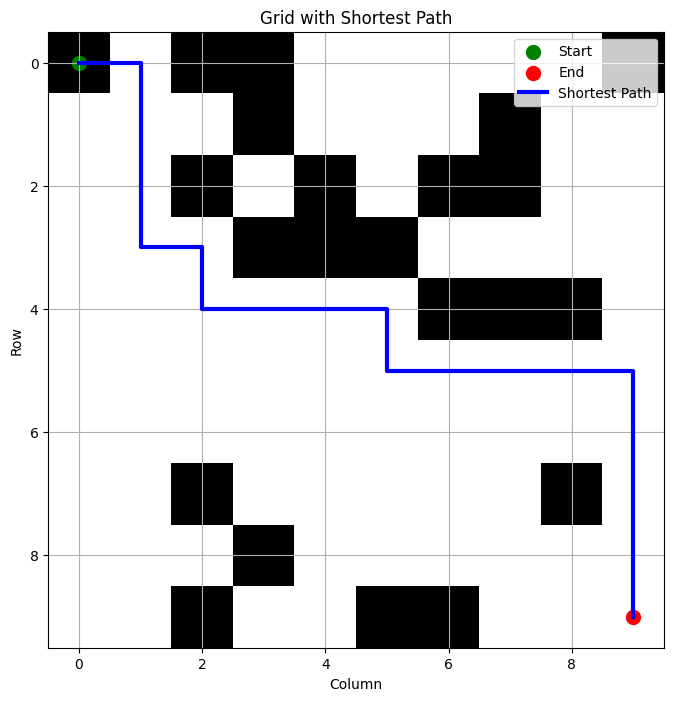

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Define the dimensions of the grid
ROWS = 10
COLS = 10

# Define the start and end points
start = (0, 0)
end = (ROWS-1, COLS-1)

# Generate a random matrix representing the grid
grid = np.random.choice([0, 1], size=(ROWS, COLS), p=[0.8, 0.2])

# Define the heuristic function (Manhattan distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Define a function to get the neighbors of a cell
def get_neighbors(cell):
    row, col = cell
    neighbors = []
    for dr, dc in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        r = row + dr
        c = col + dc
        if 0 <= r < ROWS and 0 <= c < COLS and grid[r][c] == 0:
            neighbors.append((r, c))
    return neighbors

# Implement the A* algorithm
def astar(start, end):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {cell: float('inf') for cell in np.ndindex(ROWS, COLS)}
    g_score[start] = 0
    f_score = {cell: float('inf') for cell in np.ndindex(ROWS, COLS)}
    f_score[start] = heuristic(start, end)

    while not open_set.empty():
        _, current = open_set.get()

        if current == end:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_neighbors(current):
            tentative_g_score = g_score[current] + 1
            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, end)
                open_set.put((f_score[neighbor], neighbor))

# Find the shortest path using A*
shortest_path = astar(start, end)

# Visualize the grid and the shortest path
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='binary', interpolation='nearest')

# Highlight the start and end points
plt.scatter(*start[::-1], color='green', s=100, label='Start')
plt.scatter(*end[::-1], color='red', s=100, label='End')

# Highlight the shortest path
if shortest_path:
    path_x, path_y = zip(*shortest_path)
    plt.plot(path_y, path_x, color='blue', linewidth=3, label='Shortest Path')

plt.legend()
plt.title('Grid with Shortest Path')
plt.xlabel('Column')
plt.ylabel('Row')
plt.grid(True)
plt.show()

